In [4]:
!pip install qiskit numpy matplotlib

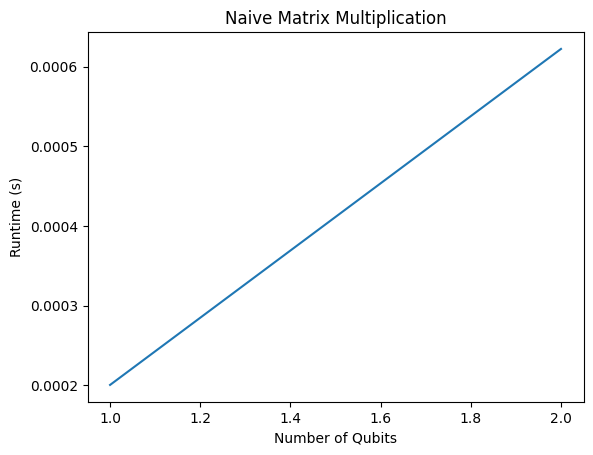

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Defining the gates
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])

# CNOT for 2 qubits (acting on qubit 0 and qubit 1)
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

# Creating initial state vector |00>
def initial_state(n_qubits):
    state = np.array([1, 0])  # |0>
    for _ in range(n_qubits - 1):
        state = np.kron(state, np.array([1, 0]))  # Tensor product to extending to n qubits
    return state

# This is a function to apply a gate to a quantum state using matrix multiplication
def apply_gate(state, gate):
    return np.dot(gate, state)

# Defining the circuit and applying gates
def quantum_circuit(n_qubits):
    state = initial_state(n_qubits)

    # Applying H to qubit 1
    if n_qubits == 1:
        state = apply_gate(state, H)

    elif n_qubits == 2:
        # Applying H to qubit 1 (first qubit)
        state = apply_gate(state, np.kron(H, I))  # Tensor product H ⊗ I

        # Applying X to qubit 1 (first qubit)
        state = apply_gate(state, np.kron(X, I))  # Tensor product X ⊗ I

        # Applying CNOT gate to qubits 1 and 2
        state = apply_gate(state, CNOT)  # CNOT operates on both qubits

    return state

# Plotting the runtime as a function of the number of qubits
qubits_range = range(1, 3)
runtimes = []
for n in qubits_range:
    start_time = time.time()
    quantum_circuit(n)
    runtimes.append(time.time() - start_time)

plt.plot(qubits_range, runtimes)
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (s)')
plt.title('Naive Matrix Multiplication')
plt.show()


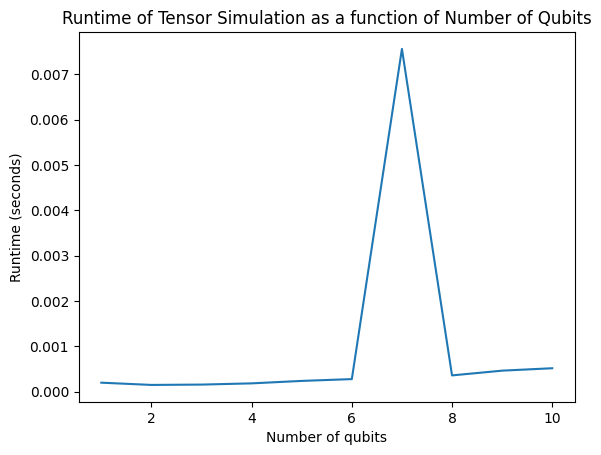

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Defining the gate matrices
X = np.array([[0, 1], [1, 0]])  # Pauli-X gate
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)  # Hadamard gate
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])  # CNOT gate

# Initialiinge an n-qubit state as a tensor
def initialize_state_tensor(n):
    state_tensor = np.zeros([2] * n)
    state_tensor[(0,) * n] = 1  # The |0...0> state
    return state_tensor

# Applying a 1-qubit gate to the state tensor on the qubit_index
def apply_1qubit_gate(state_tensor, gate, qubit_index):
    new_tensor = np.tensordot(gate, state_tensor, axes=([1], [qubit_index]))
    # Adjust the resulting tensor axes to match the original state
    return np.moveaxis(new_tensor, 0, qubit_index)

# Applying a 2-qubit gate to the state tensor on the qubit_indices
def apply_2qubit_gate(state_tensor, gate, qubit_indices):
    new_tensor = np.tensordot(gate, state_tensor, axes=([2, 3], qubit_indices))
    # Adjust the resulting tensor axes to match the original state
    return np.moveaxis(new_tensor, [0, 1], qubit_indices)

# Measuring runtime for tensor-based simulation up to 'max_qubits'
def measure_runtime(max_qubits):
    runtimes = []
    for n in range(1, max_qubits + 1):
        start_time = time.time()

        # Initializing state tensor for n qubits
        state_tensor = initialize_state_tensor(n)

        # Applying some gates (example: apply H to each qubit)
        for i in range(n):
            state_tensor = apply_1qubit_gate(state_tensor, H, i)

        # MeasuringS runtime
        runtimes.append(time.time() - start_time)

    return runtimes

# Plotting the runtime of the simulation as a function of the number of qubits
def plot_runtime(runtimes, max_qubits):
    plt.plot(range(1, max_qubits + 1), runtimes)
    plt.xlabel('Number of qubits')
    plt.ylabel('Runtime (seconds)')
    plt.title('Runtime of Tensor Simulation as a function of Number of Qubits')
    plt.show()

# Running the performance test for systems with up to 10 qubits
max_qubits = 10
runtimes = measure_runtime(max_qubits)

# Plotting the results
plot_runtime(runtimes, max_qubits)
